In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load, low_memory=False, encoding="UTF-8")
ride_data = pd.read_csv(ride_data_to_load, low_memory=False, encoding="UTF-8")

# Combine the data into a single dataset
combined_data = pd.merge(city_data, ride_data, how="outer", on="city")



# Display the data table for preview
combined_data.head()



,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


Urban       1625
Suburban     625
Rural        125
Name: type, dtype: int64

In [24]:
# Obtain the x and y coordinates for each of the three city types
#x coordinate = count_rides_city
#y coordinate = avg_fare_city
urban_city = combined_data[combined_data["type"] == "Urban"]

rural_city = combined_data[combined_data["type"] == "Rural"]

suburban_city = combined_data[combined_data["type"] == "Suburban"]


count_rides_urban = urban_city.groupby("city")["type"].count()
count_rides_rural = rural_city.groupby("city")["type"].count()
count_rides_suburban = suburban_city.groupby("city")["type"].count()




avg_fare_urban = urban_city.groupby("city").mean()["fare"]
avg_fare_rural = rural_city.groupby("city").mean()["fare"]
avg_fare_suburban= suburban_city.groupby("city").mean()["fare"]



count_drivers_urban =  urban_city.groupby("city")["driver_count"].first()
count_drivers_rural =  rural_city.groupby("city")["driver_count"].first()
count_drivers_suburban =suburban_city.groupby("city")["driver_count"].first()






#City Type (Urban, Suburban, Rural)
#city_type = combined_data["type"].value_counts()

## Bubble Plot of Ride Sharing Data

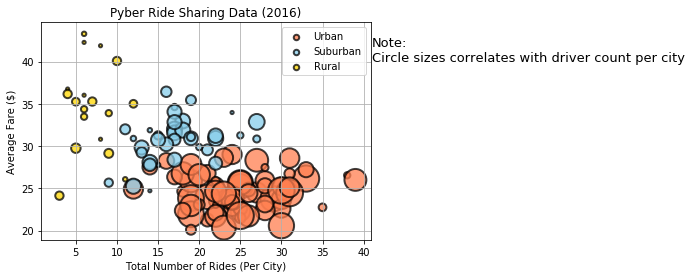

In [52]:

fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(121)

ax.scatter(count_rides_urban, avg_fare_urban, s=count_drivers_urban*10, marker = "o", label = "Urban",
           color="coral", alpha=.75, edgecolors="black", linewidth=2)
ax.scatter(count_rides_suburban, avg_fare_suburban, s=count_drivers_suburban*10, label = "Suburban",
           marker = "o",color= "skyblue", alpha=.75, edgecolors="black", linewidth=2)
ax.scatter(count_rides_rural, avg_fare_rural, s=count_drivers_rural*10 ,marker = "o", label= "Rural", 
           color="gold", alpha=.75, edgecolors="black", linewidth=2)




plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")







lgnd = plt.legend()
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.grid()

plt.text(41,40,"Note:\nCircle sizes correlates with driver count per city", fontsize=13)
plt.show()


fig.savefig("Images_Results/Rides_by_AvgFare.png")

## Total Fares by City Type

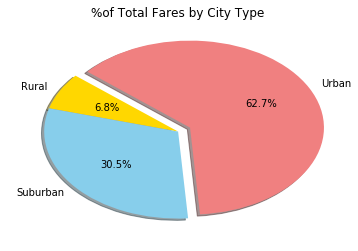

In [49]:
#fare by city type

per_type_fare = round(combined_data.groupby(["type"]).sum()["fare"]/combined_data["fare"].sum()*100,1)


label= per_type_fare.index
colors = ["gold", "skyblue","lightcoral"]





plt.pie(per_type_fare, colors=colors, labels=label, autopct="%1.1f%%", shadow=True, startangle=140, explode=[0,0,0.1])

plt.title("%of Total Fares by City Type")

plt.savefig("Images_Results/Fares_by_CityType.png")

## Total Rides by City Type

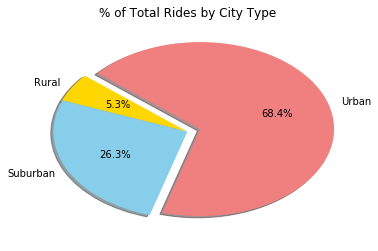

In [48]:
#Total Rides by City Type
per_type_rides =combined_data.groupby(["type"]).count()["ride_id"]/combined_data["ride_id"].count()*100


label= per_type_rides.index
colors = ["gold", "skyblue","lightcoral"]



plt.pie(per_type_rides, colors=colors, labels=label, autopct="%1.1f%%", shadow=True, startangle=140, explode=[0,0,0.1])

plt.title("% of Total Rides by City Type")


plt.savefig("Images_Results/Rides_by_CityType.png")

## Total Drivers by City Type

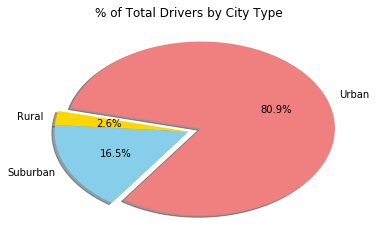

In [47]:
count_drivers_urban_df = pd.DataFrame(count_drivers_urban).reset_index()
sum_urban_drivers = count_drivers_urban_df["driver_count"].sum()


count_drivers_rural_df = pd.DataFrame(count_drivers_rural).reset_index()
sum_rural_drives = count_drivers_rural_df["driver_count"].sum()

count_drivers_suburban_df = pd.DataFrame(count_drivers_suburban ).reset_index()
sum_suburban_drives = count_drivers_suburban_df["driver_count"].sum()





sum_urban_drivers 
sum_rural_drives
sum_suburban_drives

fig = plt.figure()


labels= ["Urban", "Rural", "Suburban"]
sizes= [sum_urban_drivers, sum_rural_drives, sum_suburban_drives]
colors = ["lightcoral", "gold", "skyblue"]
explode=[0.1,0,0]


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=235)


plt.title('% of Total Drivers by City Type')

plt.savefig("Images_Results/Drivers_by_CityType.png")